# Exercise 01.1
# Nicolás Bernal Cod: 201014697, Felipe Carvajal Cod. 201728562


Create a function that receives two inputs a and b, and returns the product of the a decimal of pi and the b decimal of pi.

```
i.e, 
pi = 3.14159
if a = 2 and b = 4
result = 4 * 5
result = 20
```

Caveats:
- a and b are between 1 and 15
- decimals positions 1 and 2 are 1 and 4, respectively. (remember that python start indexing in 0)

In [1]:
from math import pi
def mult_dec_pi(a, b):
    
    # Add the solution here
    if a>15 or b>15:
        return "Error"
    else:
        texto = list(str(pi)) 
        n1 = float(texto[a+1])
        n2 = float(texto[b+1])

        result = n1*n2

        return result

In [2]:
mult_dec_pi(a=2, b=4)
# 20.0

20.0

In [3]:
mult_dec_pi(a=5, b=10)
# 45.0

45.0

In [4]:
mult_dec_pi(a=14, b=1)
# 9.0

9.0

In [5]:
mult_dec_pi(a=6, b=8)
# 10.0

10.0

In [6]:
# Bonus
mult_dec_pi(a=16, b=4)
# 'Error'

'Error'

# Exercise 01.2

Using the given dataset. Estimate a linear regression between Employed and GNP.

$$Employed = b_0 + b_1 * GNP $$

$$\hat b = (X^TX)^{-1}X^TY$$
$$Y = Employed$$
$$X = [1  \quad GNP]$$

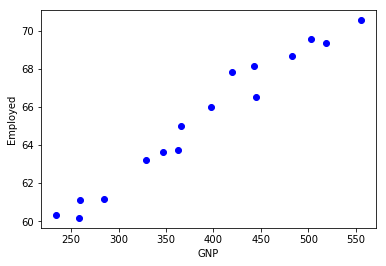

In [7]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
# Import data
raw_data = """
Year,Employed,GNP
1947,60.323,234.289
1948,61.122,259.426
1949,60.171,258.054
1950,61.187,284.599
1951,63.221,328.975
1952,63.639,346.999
1953,64.989,365.385
1954,63.761,363.112
1955,66.019,397.469
1956,67.857,419.18
1957,68.169,442.769
1958,66.513,444.546
1959,68.655,482.704
1960,69.564,502.601
1961,69.331,518.173
1962,70.551,554.894"""

data = []
for line in raw_data.splitlines()[2:]:
    words = line.split(',')
    data.append(words)
data = np.array(data, dtype=np.float)
n_obs = data.shape[0]
plt.plot(data[:, 2], data[:, 1], 'bo')
plt.xlabel("GNP")
plt.ylabel("Employed")

In [8]:
from numpy.linalg import inv
x = data.copy()
y = x[:,1]
print(y)
x = np.delete(x, 0, 1)
x[:,0] = 1
xt = x.transpose()
beta = np.matmul(np.matmul(inv(np.matmul(xt,x)),xt),y)
bet = np.matmul(np.matmul(inv(np.matmul(xt,x)),xt),y)
yest = beta[0]+x[:,1]*beta[1]
yest

[ 60.323  61.122  60.171  61.187  63.221  63.639  64.989  63.761  66.019
  67.857  68.169  66.513  68.655  69.564  69.331  70.551]


array([ 59.98567007,  60.8592385 ,  60.81155835,  61.734058  ,
        63.27622581,  63.90260117,  64.54155685,  64.46256489,
        65.65654946,  66.41105653,  67.2308284 ,  67.29258322,
        68.61866127,  69.31012767,  69.8512904 ,  71.1274294 ])

# Exercise 01.3

Analyze the baby names dataset using pandas

In [9]:
import pandas as pd
# Load dataset
import zipfile
with zipfile.ZipFile('../datasets/baby-names2.csv.zip', 'r') as z:
    f = z.open('baby-names2.csv')
    names = pd.io.parsers.read_table(f, sep=',')

In [10]:
names.head()

,year,name,prop,sex,soundex
0,1880,John,0.081541,boy,J500
1,1880,William,0.080511,boy,W450
2,1880,James,0.050057,boy,J520
3,1880,Charles,0.045167,boy,C642
4,1880,George,0.043292,boy,G620


In [11]:
names[names.year == 1993].head()   

,year,name,prop,sex,soundex
113000,1993,Michael,0.024010,boy,M240
113001,1993,Christopher,0.018572,boy,C623
113002,1993,Matthew,0.017332,boy,M300
113003,1993,Joshua,0.016268,boy,J200
113004,1993,Tyler,0.014439,boy,T460


### segment the data into boy and girl names

In [12]:
boys = names[names.sex == 'boy'].copy()    
girls = names[names.sex == 'girl'].copy()

### Analyzing the popularity of a name over time

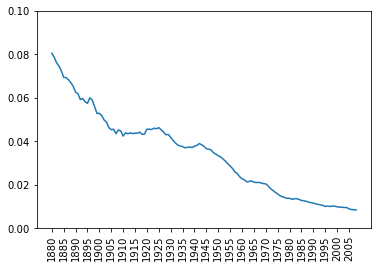

In [13]:
william = boys[boys['name']=='William']

plt.plot(range(william.shape[0]), william['prop'])
plt.xticks(range(william.shape[0])[::5], william['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

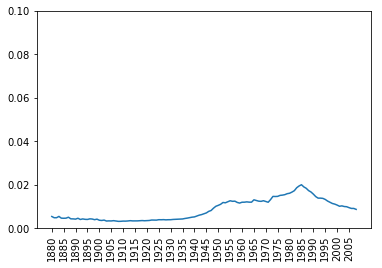

In [14]:
Daniel = boys[boys['name']=='Daniel']

plt.plot(range(Daniel.shape[0]), Daniel['prop'])
plt.xticks(range(Daniel.shape[0])[::5], Daniel['year'].values[::5], rotation='vertical')
plt.ylim([0, 0.1])
plt.show()

# Exercise 01.3

Which has been the most popular boy name every decade?

In [15]:
import collections
datb = boys.sort_values("name")
datb2 = datb["name"].values
lista = datb2.tolist()
ctr = collections.Counter(lista)
max(ctr)

'Zollie'

# Exercise 01.4

Which has been the most popular girl name?


In [16]:
import collections
datb = girls.sort_values("name")
datb2 = datb["name"].values
lista = datb2.tolist()
ctr = collections.Counter(lista)
max(ctr)

'Zula'

# Exercise 01.5

What is the most popular new girl name? (new is a name that appears only in the 2000's)

In [17]:
import collections
datb = girls[girls.year == 2000].copy()
datb = datb.sort_values("name")
datb2 = datb["name"].values
lista = datb2.tolist()
ctr = collections.Counter(lista)
max(ctr)

'Zoie'